<a href="https://colab.research.google.com/github/Buswir/TUBESKCB/blob/main/Copy_of_main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Anggota Kelompok:
# - Arjun Ahmad Santoso (2311102211)
# - Buswiryawan Raditya Boenyamin (2311102090)
# - W ()

In [ ]:
!pip install kaggle

In [ ]:
from google.colab import files

# Upload file kaggle.json with correct configuration in order to be able to load the dataset
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{\n"username": "JunJun1066",\n"key": "KGAT_b07d675e405aeb708a86ce114737f944"\n}'}

In [ ]:
# Create necesarry directory and move kaggle.json to it

!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

mv: cannot stat 'kaggle.json': No such file or directory


In [ ]:
# Download the dataset

!kaggle datasets download -d sujaykapadnis/banana-disease-recognition-dataset

Dataset URL: https://www.kaggle.com/datasets/sujaykapadnis/banana-disease-recognition-dataset
License(s): Attribution 4.0 International (CC BY 4.0)
  0% 0.00/122M [00:00<?, ?B/s]
100% 122M/122M [00:00<00:00, 2.62GB/s]


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:
import os
import zipfile

zip_file_name = 'banana-disease-recognition-dataset.zip'

# Unzip the file
with zipfile.ZipFile(zip_file_name, 'r') as zip_ref:
    zip_ref.extractall() # Extracts to the current directory

In [ ]:
import pathlib

# Specify the directory
data_dir = pathlib.Path("/content/Banana Disease Recognition Dataset")

In [ ]:
image_count = len(list(data_dir.glob('*/*/*/*.jpg')))
print(image_count)

3264


sigatoka count: 536
A sample of banana's leaf with sigatoka desease:


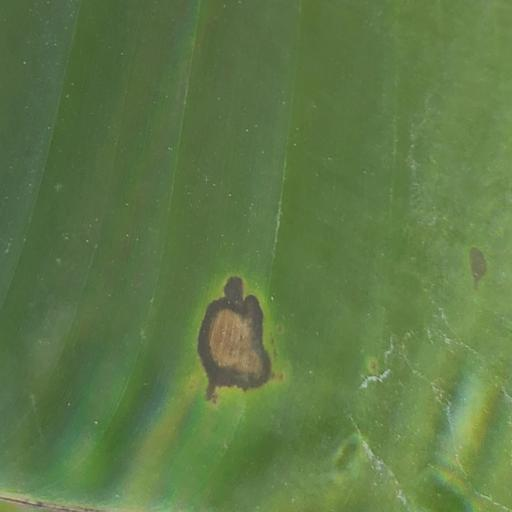

In [ ]:
sigatoka = list(
    data_dir.glob('Original Images/Original Images/Banana Black Sigatoka Disease/*')
) + list(
    data_dir.glob('Augmented images/Augmented images/Augmented Banana Black Sigatoka Disease/*')
)
img_count = len(sigatoka)
print("sigatoka count:", img_count)
print("A sample of banana's leaf with sigatoka desease:")
PIL.Image.open(str(sigatoka[0]))

bmv count: 400
A sample of banana's leaf with bmv desease:


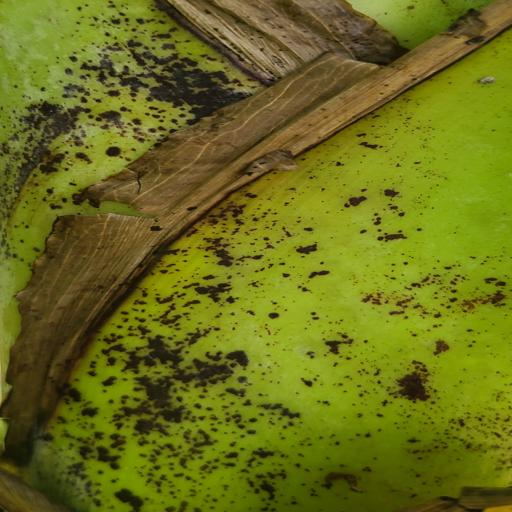

In [ ]:
bmv = list(
    data_dir.glob('Original Images/Original Images/Banana Bract Mosaic Virus Disease/*')
) + list(
    data_dir.glob('Augmented images/Augmented images/Augmented Banana Bract Mosaic Virus Disease/*')
)
img_count = len(bmv)
print("bmv count:", img_count)
print("A sample of banana's leaf with bmv desease:")
PIL.Image.open(str(bmv[0]))

In [ ]:
batch_size = 32
img_height = 180
img_width = 180

In [ ]:
train_original_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir.joinpath("Original Images/Original Images/"),
  label_mode='int',
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

original_class_names = train_original_ds.class_names

train_augmented_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir.joinpath("Augmented images/Augmented images/"),
  label_mode='int',
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

# Remove unecesarry prefix "Augmented " from the class names
train_augmented_ds.class_names = [name.removeprefix("Augmented ") for name in original_class_names]
print(train_augmented_ds.class_names)

# Concat the original dataset and the augmented dataset
train_ds = train_original_ds.concatenate(train_augmented_ds)
# Verify the class names
print(original_class_names)


Found 408 files belonging to 7 classes.
Using 327 files for training.
Found 2856 files belonging to 7 classes.
Using 2285 files for training.
['Banana Black Sigatoka Disease', 'Banana Bract Mosaic Virus Disease', 'Banana Healthy Leaf', 'Banana Insect Pest Disease', 'Banana Moko Disease', 'Banana Panama Disease', 'Banana Yellow Sigatoka Disease']
['Banana Black Sigatoka Disease', 'Banana Bract Mosaic Virus Disease', 'Banana Healthy Leaf', 'Banana Insect Pest Disease', 'Banana Moko Disease', 'Banana Panama Disease', 'Banana Yellow Sigatoka Disease']


In [ ]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3670 files belonging to 5 classes.
Using 734 files for validation.


In [ ]:
val_original_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir.joinpath("Original Images/Original Images/"),
  label_mode='int',
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

original_class_names = val_original_ds.class_names

val_augmented_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir.joinpath("Augmented images/Augmented images/"),
  label_mode='int',
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

# Remove unecesarry prefix "Augmented " from the class names
val_augmented_ds.class_names = [name.removeprefix("Augmented ") for name in original_class_names]
print(val_augmented_ds.class_names)

# Concat the original dataset and the augmented dataset
val_ds = val_original_ds.concatenate(val_augmented_ds)
# Verify the class names
print(original_class_names)

Found 408 files belonging to 7 classes.
Using 81 files for validation.
Found 2856 files belonging to 7 classes.
Using 571 files for validation.
['Banana Black Sigatoka Disease', 'Banana Bract Mosaic Virus Disease', 'Banana Healthy Leaf', 'Banana Insect Pest Disease', 'Banana Moko Disease', 'Banana Panama Disease', 'Banana Yellow Sigatoka Disease']
['Banana Black Sigatoka Disease', 'Banana Bract Mosaic Virus Disease', 'Banana Healthy Leaf', 'Banana Insect Pest Disease', 'Banana Moko Disease', 'Banana Panama Disease', 'Banana Yellow Sigatoka Disease']


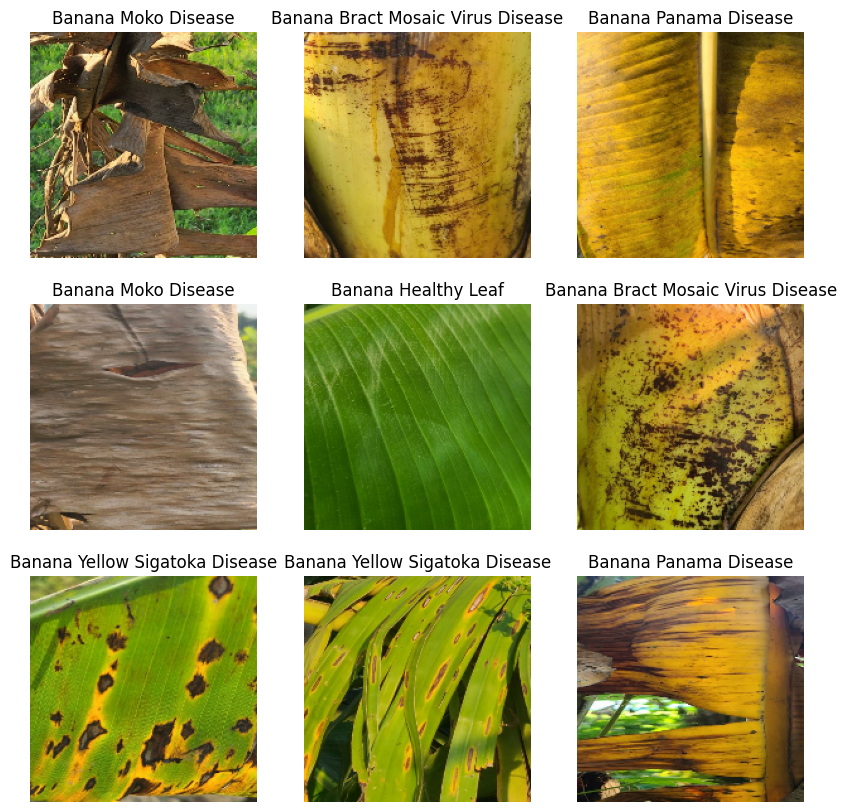

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(original_class_names[labels[i]])
    plt.axis("off")

In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
normalization_layer = layers.Rescaling(1./255)

In [ ]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.0 1.0


In [ ]:
num_classes = len(original_class_names)

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 53s 616ms/step - accuracy: 0.3198 - loss: 2.0425 - val_accuracy: 0.5537 - val_loss: 1.0763
Epoch 2/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 50s 607ms/step - accuracy: 0.6345 - loss: 0.8826 - val_accuracy: 0.6380 - val_loss: 0.8590
Epoch 3/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 82s 615ms/step - accuracy: 0.6995 - loss: 0.7554 - val_accuracy: 0.6825 - val_loss: 0.7514
Epoch 4/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 50s 607ms/step - accuracy: 0.7518 - loss: 0.6408 - val_accuracy: 0.7147 - val_loss: 0.7064
Epoch 5/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 50s 603ms/step - accuracy: 0.8173 - loss: 0.4860 - val_accuracy: 0.7316 - val_loss: 0.6662
Epoch 6/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 51s 613ms/step - accuracy: 0.8259 - loss: 0.4592 - val_accuracy: 0.7454 - val_loss: 0.6384
Epoch 7/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 81s 606ms/step - accuracy: 0.8618 - loss: 0.4066 - val_accuracy: 0.7454 - val_loss: 0.6381
Epoch 8/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 51s 610ms/step - accuracy: 0.8711 - loss: 0.3322 - val_accu

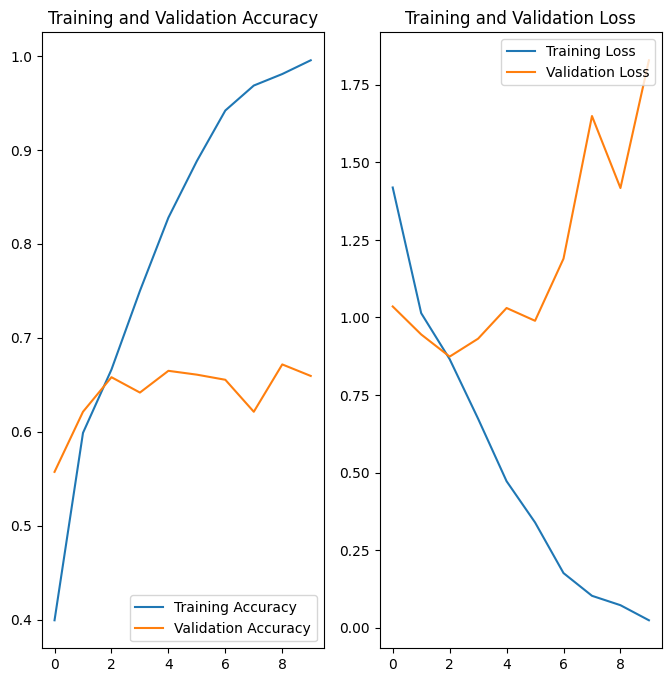

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()